# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as mplot
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv(r'D:\911.csv')

** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 17:40,NORRISTOWN,HAWS AVE,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [6]:
l=[]
k=[]
v=[]
for i in df['zip']: 
    if str(i) != 'nan': #removing any occurance of 'nan'
        l.append(i)
for i in list(set(l)): #iterating in unique list
    k.append(i)
    v.append(l.count(i)) #counting the values in original list
ser=pd.Series(v,k)
ser.sort_values(ascending=False).head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

In [7]:
l=[i for i in df['zip'] if str(i) != 'nan'] #create a list without NaN
pd.Series([l.count(i) for i in list(set(l))],list(set(l))).sort_values(ascending=False).head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

In [8]:
df.groupby('zip').count()['lat'].sort_values(ascending = False).head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: lat, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
#Method 1
l=[]
k=[]
v=[]
for i in df['twp']:
    if str(i) != 'nan': #removing any occurance of 'nan'
        l.append(i)
for i in list(set(l)): #iterating in unique list
    k.append(i)
    v.append(l.count(i)) #counting the values in original list
ser=pd.Series(v,k)
ser.sort_values(ascending=False).head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

In [10]:
#Method 2
l=[i for i in df['twp'] if str(i) != 'nan'] #create a list without NaN
pd.Series([l.count(i) for i in list(set(l))],list(set(l))).sort_values(ascending=False).head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

In [11]:
#Method 3
df.groupby('twp').count()['lat'].sort_values(ascending = False).head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: lat, dtype: int64

In [12]:
#Method 4
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [13]:
df.groupby('title').count()['lat'].count() #method 1

110

In [14]:
len(set(df['title'])) #method 2

110

In [15]:
len(df['title'].value_counts()) #method 3

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [16]:
df['Reason']=[i[0] for i in df['title'].apply((lambda x: x.split(':'))).values] #method 1

In [17]:
df['Reason']=df['title'].apply(lambda x: x.split(':')[0]) #method 2

** What is the most common Reason for a 911 call based off of this new column? **

In [18]:
df.groupby('Reason').count()['lng'].sort_values(ascending = False)

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: lng, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

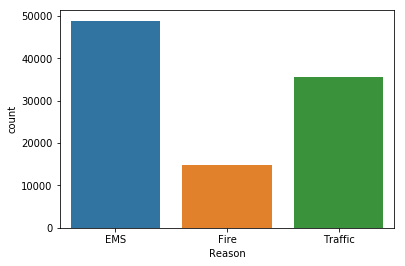

In [19]:
sns.countplot(x='Reason',data=df)

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [20]:
df.dtypes

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
dtype: object

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [21]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [22]:
df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Reason               object
dtype: object

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [23]:
df['Hour']=df['timeStamp'].apply(lambda x: x.hour)
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [24]:
dmap ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

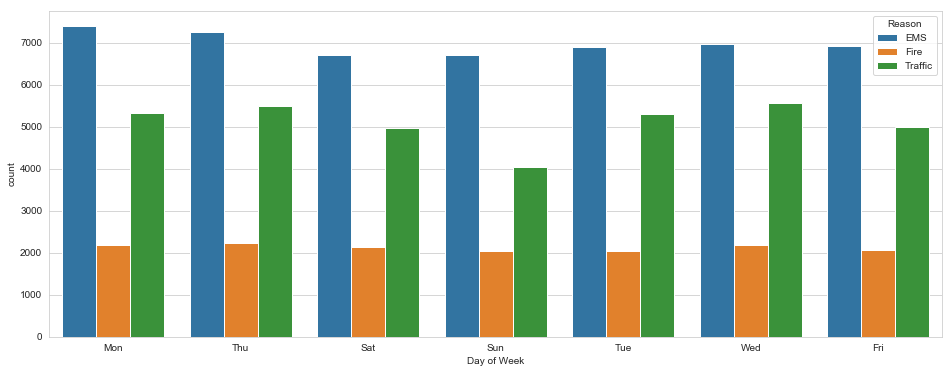

In [25]:
#Method by using Seaborn
plt.figure(figsize=(16, 6)) #increase the width of a seaborn plot
sns.set_style("whitegrid")
sns.countplot(x=df['Day of Week'],data=df,hue = df['Reason'])

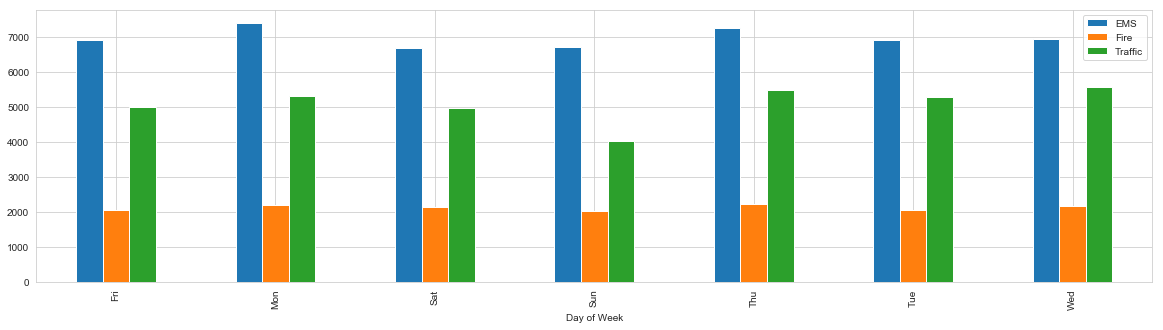

In [26]:
# Method-2 by using pandas Dataframe plot() method
df1 = df.groupby(['Day of Week','Reason']).count()
df2= df1.reset_index()

# Prepare required data
EMS_list = list(df2[df2['Reason'] == 'EMS']['lat'])
Fire_list = list(df2[df2['Reason'] == 'Fire']['lat'])
Traffic_list = list(df2[df2['Reason'] == 'Traffic']['lat'])
DoW_arr = np.unique(df2['Day of Week'])
dict_data = {'Day of Week':DoW_arr,'EMS':EMS_list,'Fire':Fire_list,'Traffic':Traffic_list}

# Create dataframe
df2=pd.DataFrame(dict_data,index=dict_data['Day of Week'])
df2.drop('Day of Week',axis = 1,inplace = True)
df2.index.names=['Day of Week']

#plot the graph
df2.plot(kind='bar',figsize=(20,5), grid=True)

**Now do the same for Month:**

In [27]:
mon_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month'] = df['Month'].map(mon_map)

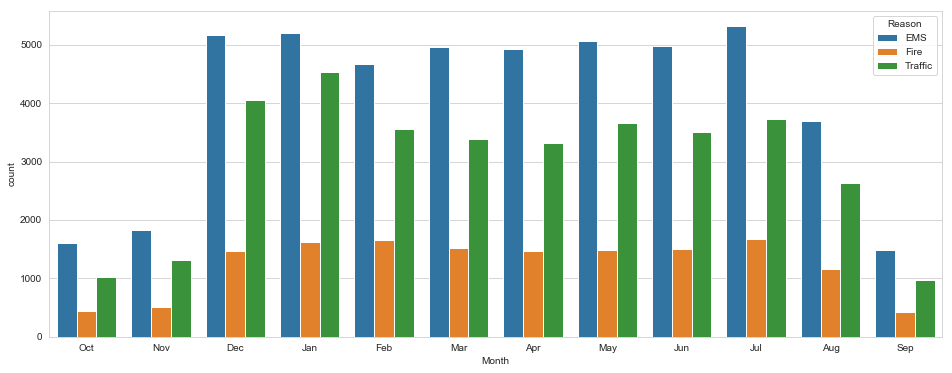

In [28]:
#Method-1 using Seaborn
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")
sns.countplot(x=df['Month'],data=df,hue=df['Reason'])

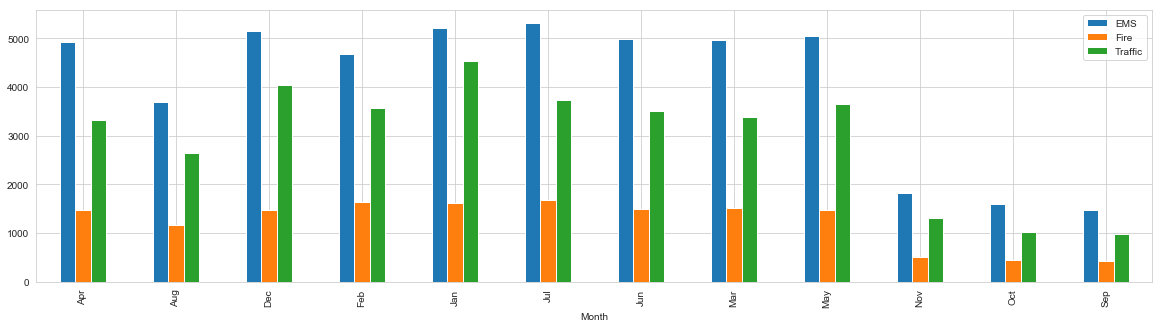

In [29]:
# Method-2 by using pandas Dataframe plot() method
df1 = df.groupby(['Month','Reason']).count()
df2 = df1.reset_index()

#Prepare required data
EMS_list = list(df2[df2['Reason'] == 'EMS']['lat'])
Fire_list = list(df2[df2['Reason'] == 'Fire']['lat'])
Traffic_list = list(df2[df2['Reason'] == 'Traffic']['lat'])
Mon_arr = np.unique(df2['Month'])
data_dict = {'Month':Mon_arr,'EMS':EMS_list,'Fire':Fire_list,'Traffic':Traffic_list}

#Prepare row and column indexes
df3=pd.DataFrame(data_dict,index=data_dict['Month'])
df3.drop('Month',axis=1,inplace=True)
df3.index.names = ['Month']

#Plot the graph
df3.plot(kind='bar',figsize=(20,5), grid=True)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [30]:
byMonth=df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
Apr,9725,9725,9725,8523,9725,9725,9722,9689,9725,9725,9725,9725
Aug,7490,7490,7490,6473,7490,7490,7487,7444,7490,7490,7490,7490
Dec,10683,10683,10683,9277,10683,10683,10676,10621,10683,10683,10683,10683
Feb,9881,9881,9881,8559,9881,9881,9876,9827,9881,9881,9881,9881
Jan,11355,11355,11355,9893,11355,11355,11351,11257,11355,11355,11355,11355


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

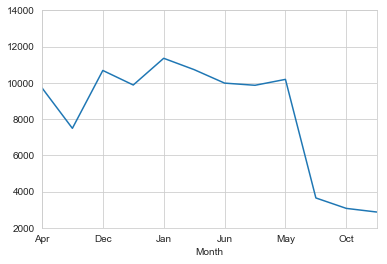

In [31]:
byMonth['title'].plot(ylim=(2000,14000))

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

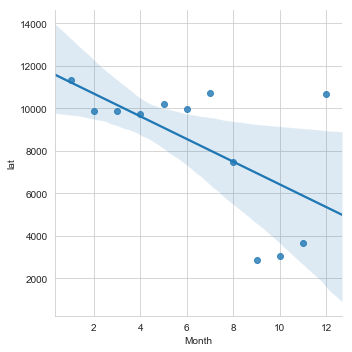

In [32]:
mon_int = {v:k for k,v in mon_map.items()}
temp = byMonth.reset_index()
temp['Month']=temp['Month'].map(mon_int)

sns.lmplot('Month','lat',temp)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [33]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

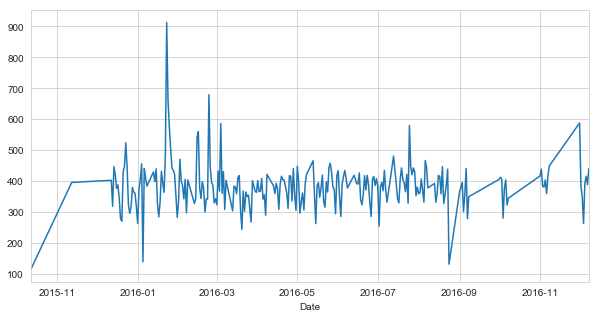

In [34]:
df.groupby('Date').count()['lat'].plot(figsize=(10,5))

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

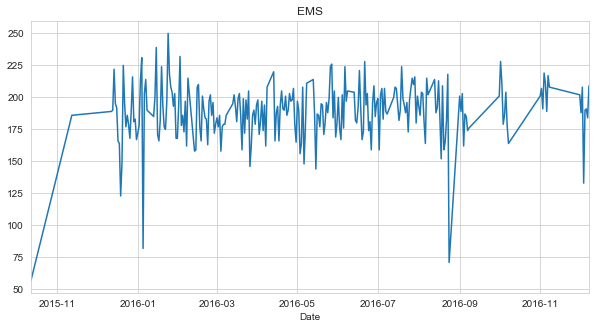

In [35]:
df1=df.groupby(['Date','Reason']).count().reset_index().set_index('Date')
df1[df1['Reason']=='EMS']['lat'].plot(figsize=(10,5),title ="EMS")

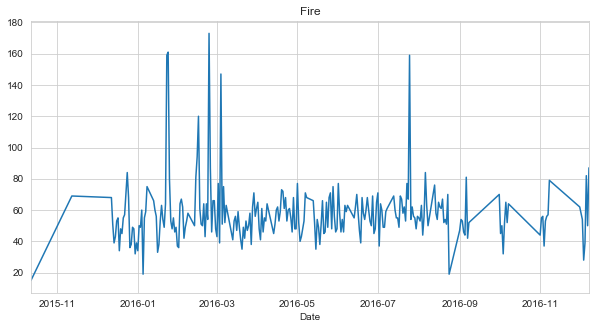

In [36]:
df1[df1['Reason']=='Fire']['lat'].plot(figsize=(10,5),title='Fire')

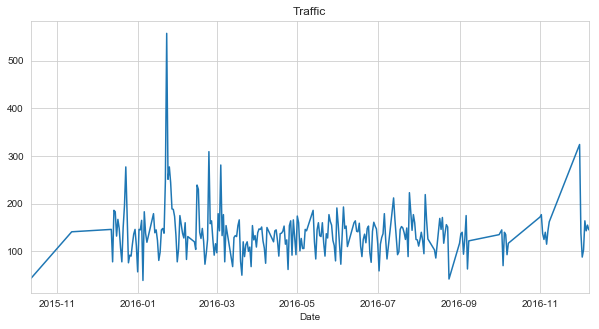

In [37]:
df1[df1['Reason']=='Traffic']['lat'].plot(figsize=(10,5),title='Traffic')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [38]:
df.groupby(['Hour','Day of Week']).count()['lat'].unstack(0)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,283,220,211,184,214,207,379,551,751,699,...,880,862,944,947,785,659,593,489,477,419
Mon,279,228,215,191,205,265,377,637,766,793,...,859,952,1014,1031,898,818,670,536,492,328
Sat,355,266,221,244,229,249,305,482,584,683,...,812,824,874,875,823,712,619,551,492,396
Sun,353,296,274,227,199,221,335,527,517,665,...,774,756,764,766,715,628,561,524,445,359
Thu,296,231,233,183,188,204,360,564,771,795,...,893,975,954,985,848,737,716,648,470,411
Tue,283,247,189,188,218,237,367,604,769,807,...,910,885,973,927,819,680,534,463,421,293
Wed,263,233,206,218,165,246,390,605,886,872,...,869,900,967,986,874,674,684,577,486,353


** Now create a HeatMap using this new DataFrame. **

In [39]:
df1=df.groupby(['Hour','Day of Week']).count()['lat'].unstack(0)

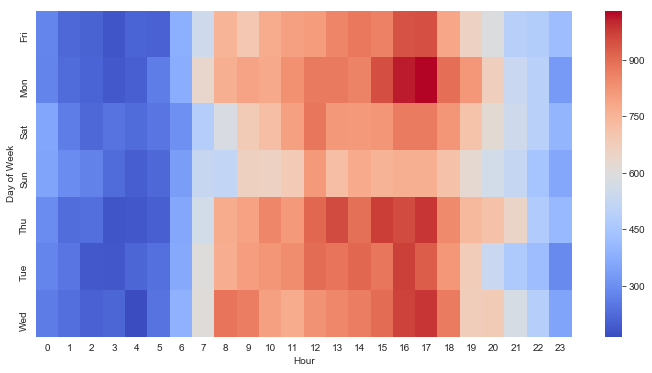

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df1,cmap="coolwarm")

** Now create a clustermap using this DataFrame. **

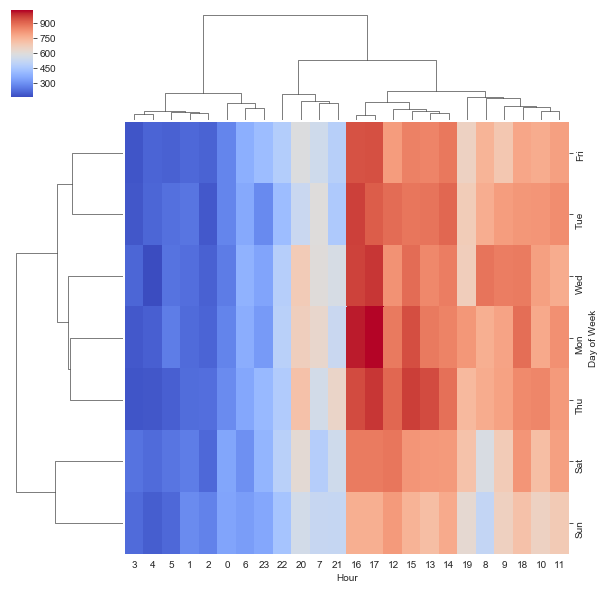

In [41]:
sns.clustermap(df1,cmap='coolwarm')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [42]:
df.groupby(['Month','Day of Week']).count()['lat'].unstack(0)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Day of Week,,,,,,,,,,,,
Fri,1956,779,1053,1138,1995,1907,1100,1359,1622,381,323,380
Mon,1217,1486,1650,1966,1364,1381,1617,1463,1481,417,521,357
Sat,1412,1188,1328,1497,1965,1373,1063,980,1467,404,751,396
Sun,989,1133,1171,1272,1637,1421,1025,1247,1822,360,413,302
Thu,1495,729,2180,1177,1610,1646,1568,1494,1197,780,404,715
Tue,1174,1221,1650,1373,1077,1258,1650,1797,1476,866,281,441
Wed,1482,954,1651,1458,1707,1743,1962,1525,1126,439,378,279


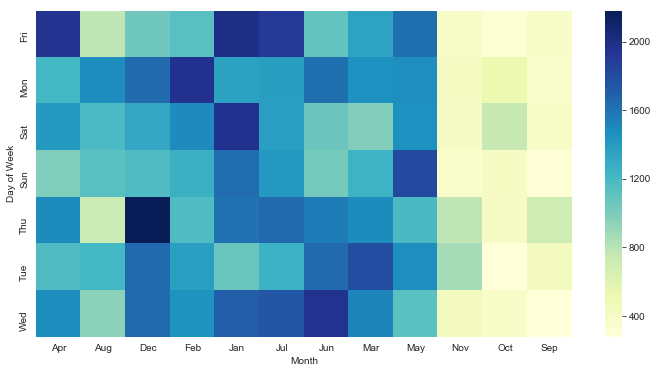

In [43]:
#Create a Heatmap of the dataframe
df2=df.groupby(['Month','Day of Week']).count()['lat'].unstack(0)
plt.figure(figsize=(12,6))
sns.heatmap(df2,cmap='YlGnBu')

<Figure size 864x432 with 0 Axes>

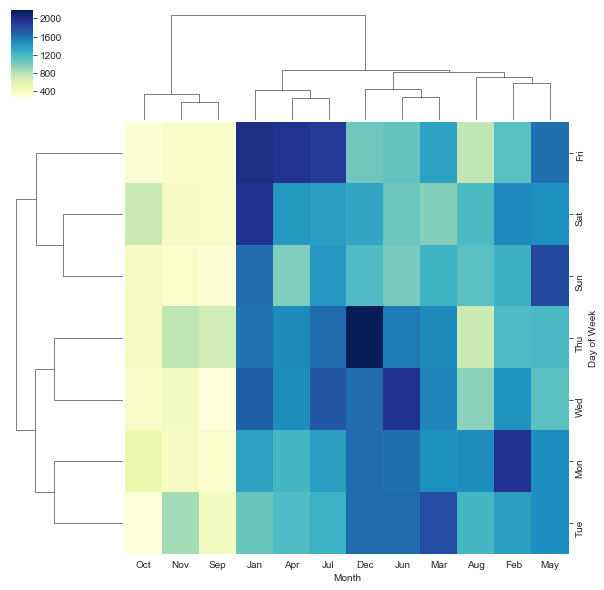

In [44]:
#Create a Clustermap of the dataframe with Month as a column
plt.figure(figsize=(12,6))
sns.clustermap(df2, cmap='YlGnBu')